In [14]:
import re

# Open the file for reading
with open('../test_data/ASCAT_test_new_scaling.ldas_log.20150401_0000z.txt', 'r') as file:

    # Read the file contents
    contents = file.read()

    # Define the regular expression pattern
    pattern = r'Total count: ([0-9]+) Less than count: ([0-9]+) Greater than count: ([0-9]+)'

    # Find all the lines that match the pattern
    matches = re.findall(pattern, contents)

    # Print the matches
    for match in matches:
        total_count = match[0]
        less_than_count = match[1]
        greater_than_count = match[2]
        print(f'Total count: {total_count}, Less than count: {less_than_count}, Greater than count: {greater_than_count}')

In [15]:
import re

# Open the file for reading
with open('../test_data/ASCAT_test_new_scaling.ldas_log.20150401_0000z.txt', 'r') as file:

    # Read the file contents
    contents = file.read()

    # Define the regular expression pattern
    pattern = r'Total count: (\d+)  Less than count: (\d+)  Greater than count: (\d+)'

    # Find all the lines that match the pattern
    matches = re.findall(pattern, contents)

    # Calculate the mean of the total_count values
    total_counts = [int(match[0]) for match in matches]
    mean_total_count = sum(total_counts) / len(total_counts)
    mean_less_than_count = sum([int(match[1]) for match in matches]) / len(matches)
    mean_greater_than_count = sum([int(match[2]) for match in matches]) / len(matches)

    # Print the mean total count
    print(f'Number of observation species windows: {len(matches)}')
    print(f'Mean total count: {mean_total_count}')
    print(f'Mean less than count: {mean_less_than_count}')
    print(f'Mean greater than count: {mean_greater_than_count}')

    print(f'Percentage of observations removed because too low: {mean_less_than_count / mean_total_count * 100:.2f}%')
    print(f'Percentage of observations removed because too high: {mean_greater_than_count / mean_total_count * 100:.2f}%')

Number of observation species windows: 16
Mean total count: 8997.9375
Mean less than count: 220.6875
Mean greater than count: 101.5625
Percentage of observations removed because too low: 2.45%
Percentage of observations removed because too high: 1.13%


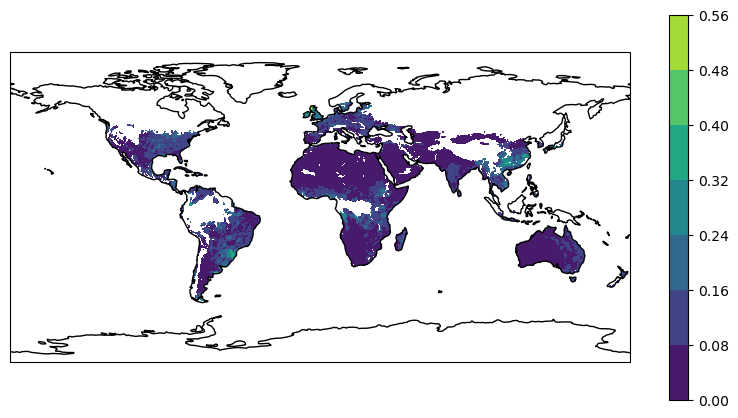

In [40]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

# Open the netCDF file
ds = xr.open_dataset('../test_data/M36_zscore_stats_2015_doy91_2021_doy90_W_75d_Nmin_5_spALL_all_pentads.nc4', decode_times=False)

# Extract the m_min, lon, and lat variables
m_min = ds['m_min'].transpose('lat', 'lon')

# Replace all occurrences of -9999. with np.nan
m_min = np.where(m_min == -9999., np.nan, m_min)

lon = ds['lon']
lat = ds['lat']

# Create a map with PlateCarree projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the m_min data as a color mesh
mesh = ax.contourf(lon, lat, m_min, transform=ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=0.6)

# Add coastlines and a colorbar
ax.coastlines()
plt.colorbar(mesh)

# Show the plot
plt.show()

In [66]:
import xarray as xr
import numpy as np

# Open the netCDF file
ds = xr.open_dataset('../test_data/M36_zscore_stats_2015_doy91_2021_doy90_W_75d_Nmin_5_spALL_all_pentads.nc4', decode_times=False)

# Extract the m_mean variable
m_mean = ds['m_mean'].transpose('pentad', 'lat', 'lon')

# Replace all occurrences of -9999. with np.nan
m_mean = np.where(m_mean == -9999., np.nan, m_mean)

# Calculate the mean over the pentad dimension
m_mean_pentad_mean = np.nanmean(m_mean, axis=0)
m_mean_pentad_min = np.min(m_mean, axis=0)

# Print the size of the m_mean_pentad_mean array
print(f'Size of m_mean_pentad_mean: {m_mean_pentad_mean.size}')



Size of m_mean_pentad_mean: 1036800


/var/folders/p3/6g36x17x60d12xdgb49ryq4r0000gr/T/ipykernel_39582/3854189453.py:14: RuntimeWarning: Mean of empty slice
  m_mean_pentad_mean = np.nanmean(m_mean, axis=0)


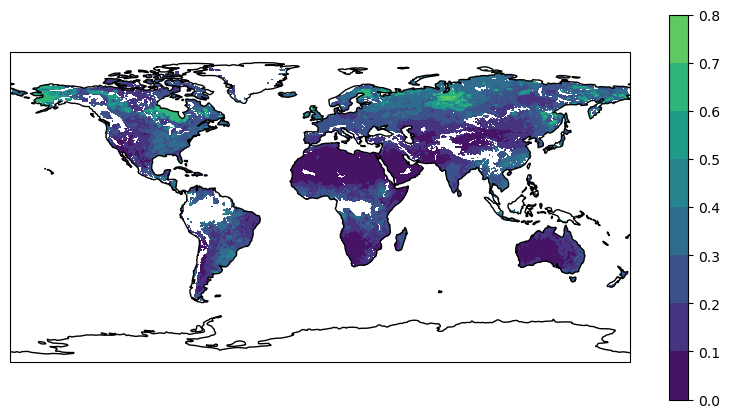

In [67]:
# Create a map with PlateCarree projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the m_min data as a color mesh
mesh = ax.contourf(lon, lat, m_mean_pentad_mean, transform=ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=1.0)

# Add coastlines and a colorbar
ax.coastlines()
plt.colorbar(mesh)

# Show the plot
plt.show()

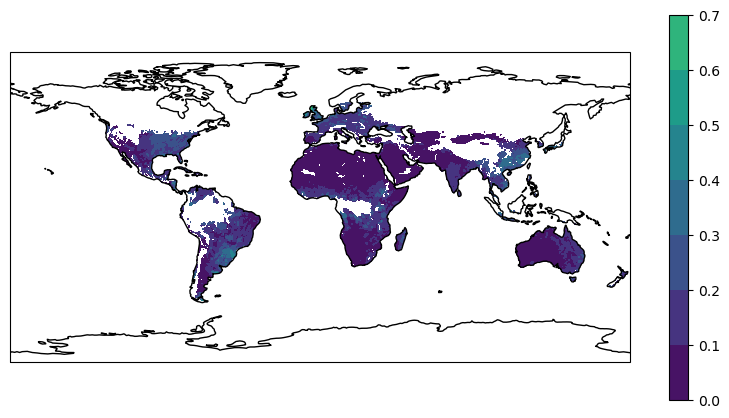

In [68]:
# Create a map with PlateCarree projection
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the m_min data as a color mesh
mesh = ax.contourf(lon, lat, m_mean_pentad_min, transform=ccrs.PlateCarree(), cmap='viridis', vmin=0, vmax=1.0)

# Add coastlines and a colorbar
ax.coastlines()
plt.colorbar(mesh)

# Show the plot
plt.show()

In [65]:
np.nanmean(m_mean_pentad_mean)



0.20141832961877879